In [1]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/wine-quality/winequality-red.csv",delimiter=';')
b=pd.read_csv("/kaggle/input/wine-quality/winequality-white.csv",delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.loc['quality']

KeyError: 'quality'

In [7]:
#df.isnull().sum();b.isnull().sum()

In [68]:
a.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


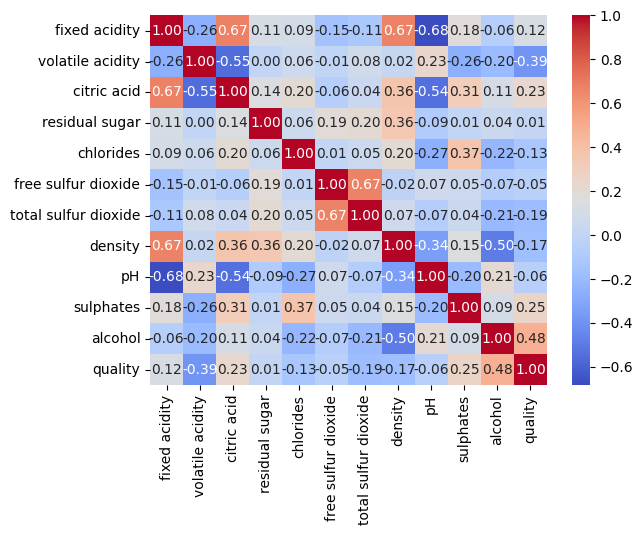

In [91]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values(ascending=False)
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

In [92]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
model.fit(X, y)

importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)


alcohol                 0.269141
sulphates               0.138736
volatile acidity        0.134374
total sulfur dioxide    0.078107
chlorides               0.062976
pH                      0.060903
residual sugar          0.054298
density                 0.053920
fixed acidity           0.053277
free sulfur dioxide     0.047312
citric acid             0.046957
dtype: float64


In [108]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor(random_state=1)
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

selected_features = X.columns[selector.support_]
print(selected_features)


Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.31194437500000005


In [113]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print('Optimized Mean Squared Error:', mse_optimized)


Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END 

In [115]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model with the best parameters
model_optimized = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=1  # for reproducibility
)

# Fit the model to the training data
model_optimized.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized = model_optimized.predict(X_test)

# Calculate the mean squared error of the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print('Optimized Mean Squared Error:', mse_optimized)


Optimized Mean Squared Error: 0.3130930375
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=16, n_estimators=95; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=16, n_estimators=178; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=12, min_samples_split=5, n_estimators=83; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=12, min_samples_split=5, n_estimators=83; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=11, min_samples_split=10, n_estimators=159; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=10, n_estimators=134; total time=   1.1s
[CV] END max_depth=13, min_samples_leaf=18, min_samples_split=12, n_estimators=70; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=17, n_estimators=114; total time=   0.6s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END max_depth=40, min_samples_leaf=4, min

In [124]:
# Assuming 'X_test' is your test data
X_new = X_test

# Use the optimized model to make predictions on the new data
y_new_pred = model_optimized.predict(X_new)

print('Predictions:', y_new_pred)


Predictions: [5.254 5.598 6.446 5.85  5.91  6.268 6.206 5.034 5.426 5.264 5.974 5.176
 5.588 6.282 5.942 5.38  6.236 5.542 5.586 5.22  5.88  6.324 5.254 6.254
 5.438 6.418 6.034 5.658 5.242 6.636 5.666 6.216 5.302 6.476 5.176 5.568
 5.058 5.524 6.912 5.054 6.062 5.084 5.038 5.85  5.02  5.898 5.086 5.302
 5.332 6.3   5.088 5.31  6.456 5.05  5.484 6.012 6.346 5.938 5.824 5.064
 6.432 4.882 5.064 5.472 4.986 5.56  6.95  5.756 5.752 6.764 5.176 6.214
 5.762 5.632 5.02  5.422 6.334 5.008 5.134 5.628 5.874 5.18  5.134 5.7
 5.828 5.072 5.11  6.752 5.032 5.98  5.114 6.36  5.156 6.938 5.952 5.284
 6.516 5.482 5.506 5.994 5.184 5.252 5.322 5.21  4.984 5.218 5.468 5.708
 5.352 5.734 6.774 5.316 5.952 5.56  4.73  6.952 5.052 5.04  5.16  4.948
 4.772 7.186 5.976 5.008 5.39  5.342 5.906 5.162 5.786 5.694 5.7   5.044
 6.25  5.386 5.826 6.606 5.106 6.38  5.862 5.834 5.19  5.756 5.38  5.194
 5.878 6.268 5.592 4.94  5.728 5.762 5.564 6.68  5.37  5.878 6.036 6.244
 6.328 6.068 6.026 5.8   7.404 5.556 5.3

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Make predictions on the test data
y_pred = model_optimized.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)


Mean Absolute Error: 0.39945624999999996
Mean Squared Error: 0.3130930375
Root Mean Squared Error: 0.5595471718273626
R^2 Score: 0.4496484930048923
